<a href="https://colab.research.google.com/github/KeerthiPrabu/dl-tools-lab/blob/main/deep_feed_forward_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip

--2022-06-12 13:43:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738776 (4.5M) [application/x-httpd-php]
Saving to: ‘DryBeanDataset.zip’

DryBeanDataset.zip  100%[===================>]   4.52M  8.62MB/s    in 0.5s    

2022-06-12 13:43:08 (8.62 MB/s) - ‘DryBeanDataset.zip’ saved [4738776/4738776]



In [2]:
!unzip DryBeanDataset.zip

Archive:  DryBeanDataset.zip
   creating: DryBeanDataset/
  inflating: DryBeanDataset/Dry_Bean_Dataset.arff  
  inflating: DryBeanDataset/Dry_Bean_Dataset.txt  
  inflating: DryBeanDataset/Dry_Bean_Dataset.xlsx  


In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bean_df = pd.read_excel('/content/DryBeanDataset/Dry_Bean_Dataset.xlsx')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
bean_df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [8]:
train, val, test = np.split(bean_df.sample(frac=1), [int(0.8*len(bean_df)), int(0.9*len(bean_df))])
train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
8820,44920,804.369,304.976923,188.539597,1.617575,0.786013,45476,239.152504,0.684652,0.987774,0.872447,0.784166,0.006789,0.001584,0.614916,0.994673,SIRA
9903,51836,852.278,323.275890,204.725641,1.579069,0.773919,52259,256.903961,0.716323,0.991906,0.896765,0.794690,0.006237,0.001534,0.631531,0.997232,SIRA
10825,27997,636.541,235.073275,152.193284,1.544571,0.762126,28462,188.803833,0.695146,0.983662,0.868298,0.803170,0.008396,0.002155,0.645082,0.996375,DERMASON
9117,46258,796.091,291.785542,202.414129,1.441528,0.720256,46750,242.688102,0.716201,0.989476,0.917215,0.831735,0.006308,0.001862,0.691782,0.997223,SIRA
636,37179,704.496,240.383587,197.179245,1.219112,0.571978,37555,217.572455,0.771669,0.989988,0.941349,0.905105,0.006466,0.002677,0.819216,0.998716,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5926,48269,877.250,356.674872,173.225712,2.059018,0.874143,48781,247.907240,0.599057,0.989504,0.788191,0.695051,0.007389,0.001064,0.483096,0.994703,HOROZ
7677,38771,740.232,275.719567,179.409911,1.536813,0.759337,39185,222.181841,0.708897,0.989435,0.889163,0.805825,0.007111,0.001850,0.649355,0.997937,SIRA
1441,42050,776.180,265.736438,201.805367,1.316796,0.650602,42638,231.386523,0.770330,0.986209,0.877104,0.870737,0.006320,0.002241,0.758183,0.998372,SEKER
13376,39545,730.923,265.870586,189.881507,1.400192,0.699954,39902,224.388631,0.727733,0.991053,0.930161,0.843977,0.006723,0.002104,0.712297,0.997353,DERMASON


In [9]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  labels = df.pop('Class')
  labels = pd.get_dummies(labels)
  df = {key: value.values[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [10]:
train_ds = df_to_dataset(train)
val_ds = df_to_dataset(val)
test_ds = df_to_dataset(test)

In [11]:
def get_normalization_layer(name, dataset):
  normalizer = tf.keras.layers.Normalization(axis=None)
  feature_ds = dataset.map(lambda x, y: x[name])
  normalizer.adapt(feature_ds)
  return normalizer

In [12]:
all_inputs, encoded_features, cols = [], [], []
for i in bean_df.columns:
    cols.append(i)
cols.remove('Class')
for header in cols:
  col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_col = normalization_layer(col)
  all_inputs.append(col)
  encoded_features.append(encoded_col)

In [14]:
num_classes = 7
x = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)
outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)
model = tf.keras.Model(all_inputs,outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [15]:
history = model.fit(train_ds,validation_data=val_ds,epochs=100, callbacks=tf.keras.callbacks.EarlyStopping(patience=5))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['Class'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


341/341 [==============================] - 2s 4ms/step - loss: 0.7136 - accuracy: 0.7435 - val_loss: 0.2840 - val_accuracy: 0.9067
Epoch 2/100
341/341 [==============================] - 1s 4ms/step - loss: 0.2627 - accuracy: 0.9129 - val_loss: 0.2345 - val_accuracy: 0.9199
Epoch 3/100
341/341 [==============================] - 1s 4ms/step - loss: 0.2234 - accuracy: 0.9217 - val_loss: 0.2055 - val_accuracy: 0.9280
Epoch 4/100
341/341 [==============================] - 1s 4ms/step - loss: 0.2080 - accuracy: 0.9229 - val_loss: 0.1967 - val_accuracy: 0.9375
Epoch 5/100
341/341 [==============================] - 1s 4ms/step - loss: 0.2009 - accuracy: 0.9251 - val_loss: 0.1933 - val_accuracy: 0.9265
Epoch 6/100
341/341 [==============================] - 1s 4ms/step - loss: 0.1990 - accuracy: 0.9266 - val_loss: 0.1917 - val_accuracy: 0.9295
Epoch 7/100
341/341 [==============================] - 1s 4ms/step - loss: 0.1929 - accuracy: 0.9286 - val_loss: 0.1880 - val_accuracy: 0.9368
Epoch 8/100

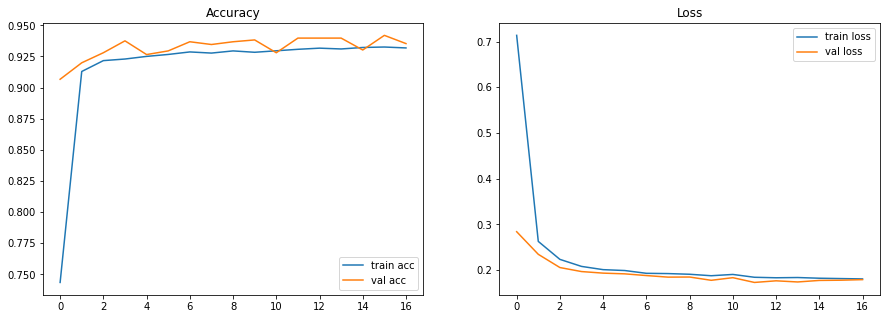

In [16]:
history = history.history

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("Accuracy")
plt.plot(history["accuracy"],label="train acc")
plt.plot(history["val_accuracy"],label="val acc")
plt.legend()

plt.subplot(122)
plt.title("Loss")
plt.plot(history["loss"],label="train loss")
plt.plot(history["val_loss"],label="val loss")
plt.legend()

plt.show()

In [17]:
loss ,accuracy = model.evaluate(test_ds)
print("test loss :",loss)
print("test accuracy :",accuracy)

43/43 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9244
test loss : 0.22203463315963745
test accuracy : 0.9243758916854858
